(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

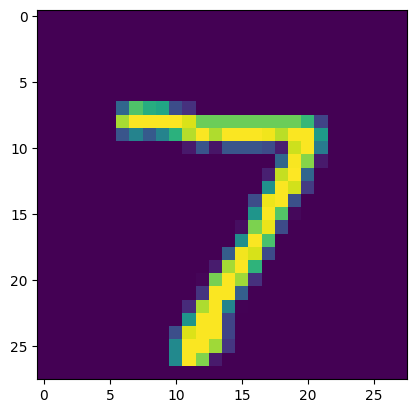

In [1]:
#데이터 로드
import matplotlib.pyplot as plt
import tensorflow as tf
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#데이터 확인
print(train_images.shape)
print(train_labels.shape)
print(train_images[0])
print(test_labels[0])
plt.imshow(test_images[0])
plt.show()

In [2]:
# 이미지 전처리
# 이 셀은 한 번만 실행해야 한다!
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [3]:
# 레이블 전처리 (원-핫 인코딩)
# 이 셀은 한 번만 실행해야 한다!
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [4]:
# 모델 정의
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\Code\Python3\뇌를자극하는파이썬\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 모델 학습
# model.fit의 결과를 history 변수에 저장.
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9239 - loss: 0.2674
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9687 - loss: 0.1082
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9798 - loss: 0.0694
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9841 - loss: 0.0513
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9894 - loss: 0.0360
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9784 - loss: 0.0633
Test accuracy: 0.9784


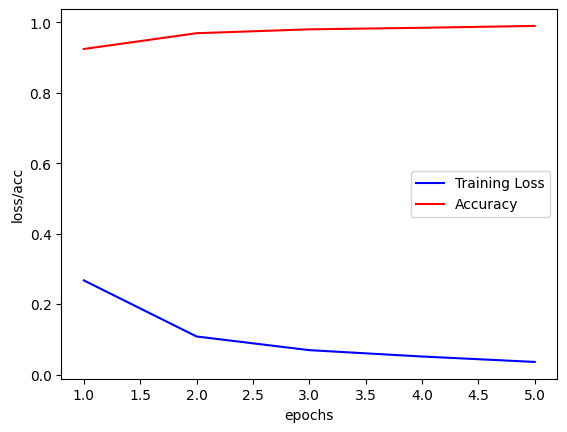

In [6]:
# 학습 과정 시각화
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.legend()
plt.show()

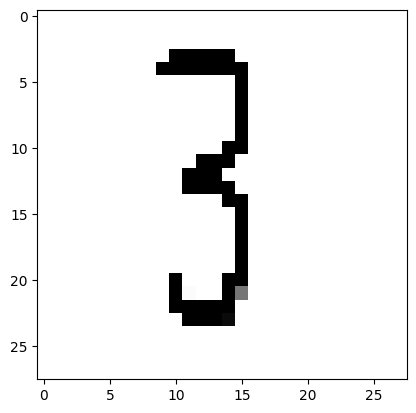

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[8.57840305e-08 1.37744064e-04 4.17070405e-04 9.98991311e-01
  5.28314843e-07 2.73123151e-04 1.66701099e-07 1.38250345e-08
  1.77404290e-04 2.62297317e-06]]
가장 큰 인덱스: 3


In [7]:
# 테스트 이미지 예측 - 원본 유지
import cv2 as cv
image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784) #평탄화
image = 255-image #이미지 반전
image /= 255.0 #이미지 전처리

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

predict = model.predict(image, batch_size=1)
print(predict)
print(f'가장 큰 인덱스: {predict.argmax()}')